In [79]:
##### setting
### set filename you want to analysis
filepath = None

if filepath == None:
    import os
    import smooziee
    filepath = os.path.join(os.path.dirname(smooziee.__file__), 'data', 'PbTe_sq_GX711_p0p25_RT_4')
    
filename = os.path.basename(filepath)


In [80]:
##### import
# from smooziee.smooziee.fitting import Fitting
# from smooziee.smooziee.peak_search import PeakSearch
from smooziee.smooziee import fitting
from smooziee.smooziee import peak_search
import imp
imp.reload(fitting)
imp.reload(peak_search)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lmfit


In [81]:
import pickle
with open('pksearch.pickle', 'rb') as f:
    processor = pickle.load(f) 

print(processor.x.shape)
print(processor.y.shape)
print(processor.ix_peaks)
print(processor.ix_peak_pairs)

(73,)
(73,)
[7, 15, 21, 28, 36, 47, 55]
[[7, 36], [15, 28]]


In [82]:
fit = fitting.Fitting(['lorentzian' for i in range(len(processor.ix_peaks))])
fit.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude         1     -inf      inf     None     True     None     None
l0_center            0     -inf      inf     None     True     None     None
l0_fwhm              2     -inf      inf     None    False 2.0000000*l0_sigma     None
l0_height       0.3183     -inf      inf     None    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma             1        0      inf     None     True     None     None
l1_amplitude         1     -inf      inf     None     True     None     None
l1_center            0     -inf      inf     None     True     None     None
l1_fwhm              2     -inf      inf     None    False 2.0000000*l1_sigma     None
l1_height       0.3183     -inf      inf     None    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma             1        0      inf     None     True     None     None
l2_amplitude         1     -inf      inf     None     True 

In [83]:
fit.set_params_expr(processor.ix_peaks, processor.ix_peak_pairs, param_names=['sigma', 'amplitude'])

In [84]:
fit.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude         1     -inf      inf     None     True     None     None
l0_center            0     -inf      inf     None     True     None     None
l0_fwhm              2     -inf      inf     None    False 2.0000000*l0_sigma     None
l0_height       0.3183     -inf      inf     None    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma             1        0      inf     None     True     None     None
l1_amplitude         1     -inf      inf     None     True     None     None
l1_center            0     -inf      inf     None     True     None     None
l1_fwhm              2     -inf      inf     None    False 2.0000000*l1_sigma     None
l1_height       0.3183     -inf      inf     None    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma             1        0      inf     None     True     None     None
l2_amplitude         1     -inf      inf     None     True 

In [85]:
fit.set_params_vary([0, 6], ['sigma'], vary=False)

In [86]:
fit.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude         1     -inf      inf     None     True     None     None
l0_center            0     -inf      inf     None     True     None     None
l0_fwhm              2     -inf      inf     None    False 2.0000000*l0_sigma     None
l0_height       0.3183     -inf      inf     None    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma             1        0      inf     None    False     None     None
l1_amplitude         1     -inf      inf     None     True     None     None
l1_center            0     -inf      inf     None     True     None     None
l1_fwhm              2     -inf      inf     None    False 2.0000000*l1_sigma     None
l1_height       0.3183     -inf      inf     None    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma             1        0      inf     None     True     None     None
l2_amplitude         1     -inf      inf     None     True 

In [87]:
fit.fit(processor.x, processor.y)

In [92]:
fit.result.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude     -1022     -inf      inf     None     True     None     None
l0_center         -215     -inf      inf     None     True     None     None
l0_fwhm              2     -inf      inf     None    False 2.0000000*l0_sigma     None
l0_height       -325.2     -inf      inf     None    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma             1        0      inf     None    False     None     None
l1_amplitude    -614.3     -inf      inf     None     True     None     None
l1_center       -15.55     -inf      inf     None     True     None     None
l1_fwhm          21.39     -inf      inf     None    False 2.0000000*l1_sigma     None
l1_height       -18.29     -inf      inf     None    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma         10.69        0      inf     None     True     None     None
l2_amplitude     1.012     -inf      inf     None     True 

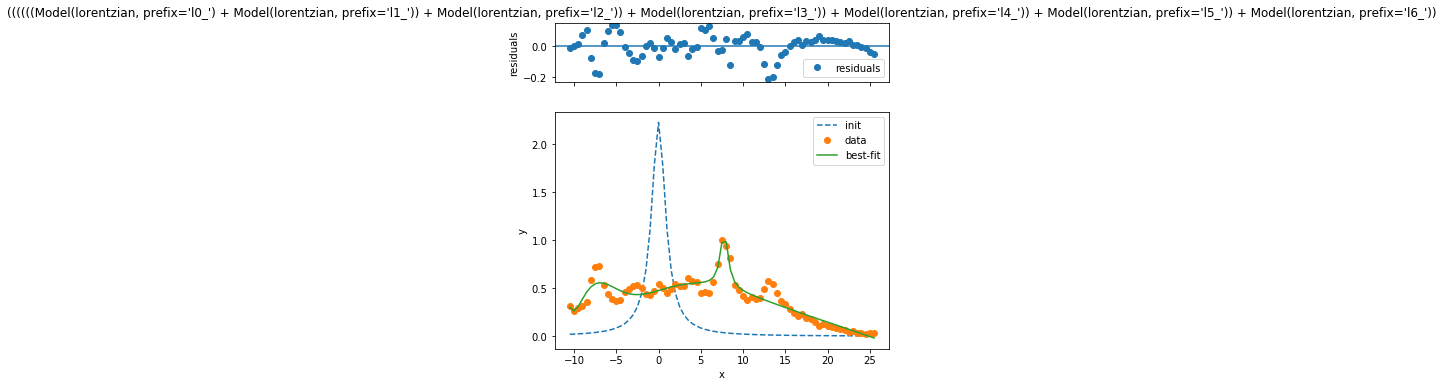

In [88]:
fit.plot(show_init=True)

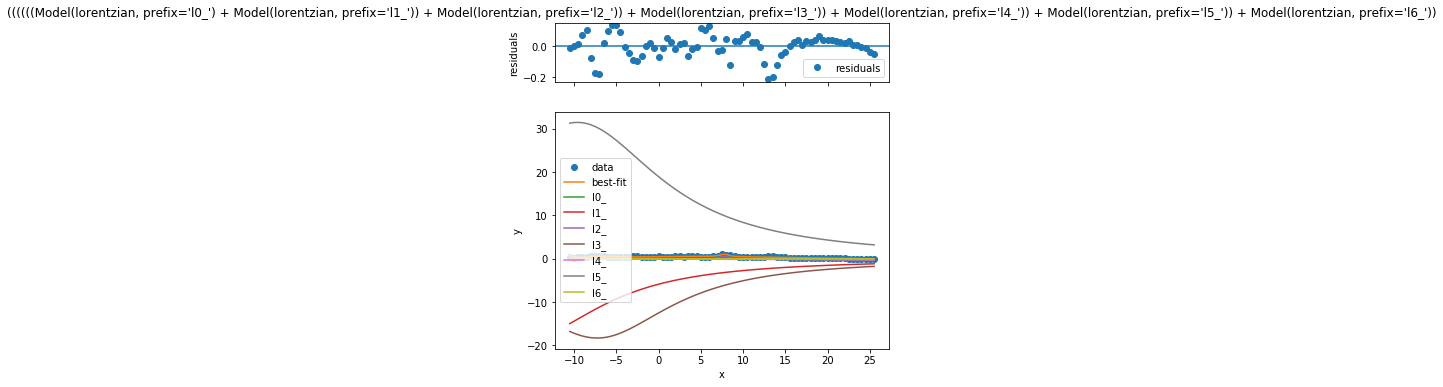

In [89]:
fit.plot_evalcomponents()

In [90]:
fit.result.eval_components()

OrderedDict([('l0_',
              array([-0.00777488, -0.007737  , -0.0076994 , -0.00766208, -0.00762502,
                     -0.00758824, -0.00755172, -0.00751546, -0.00747946, -0.00744372,
                     -0.00740824, -0.00737301, -0.00733803, -0.0073033 , -0.00726881,
                     -0.00723457, -0.00720057, -0.00716681, -0.00713329, -0.0071    ,
                     -0.00706694, -0.00703411, -0.00700152, -0.00696914, -0.006937  ,
                     -0.00690507, -0.00687336, -0.00684187, -0.0068106 , -0.00677954,
                     -0.00674869, -0.00671806, -0.00668763, -0.00665741, -0.00662739,
                     -0.00659757, -0.00656796, -0.00653854, -0.00650932, -0.0064803 ,
                     -0.00645147, -0.00642283, -0.00639439, -0.00636613, -0.00633806,
                     -0.00631017, -0.00628247, -0.00625495, -0.00622761, -0.00620044,
                     -0.00617346, -0.00614665, -0.00612002, -0.00609356, -0.00606727,
                     -0.00604114,

In [65]:
fit.result.userkws['x']

array([-10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,
        -6. ,  -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,
        -1.5,  -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,
         3. ,   3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,
         7.5,   8. ,   8.5,   9. ,   9.5,  10. ,  10.5,  11. ,  11.5,
        12. ,  12.5,  13. ,  13.5,  14. ,  14.5,  15. ,  15.5,  16. ,
        16.5,  17. ,  17.5,  18. ,  18.5,  19. ,  19.5,  20. ,  20.5,
        21. ,  21.5,  22. ,  22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5])